# Finding best-fit lines with linear regression

In [1]:
from numpy import *
def loadData(fileName):
    dataMat = [];labelList = []
    with open(fileName) as fr:
        for line in fr.readlines():
            tmpFeature = []
            splittedLine = line.strip().split('\t')
            for i in xrange(len(splittedLine)-1):
                tmpFeature.append(float(splittedLine[i]))
            dataMat.append(tmpFeature)
            labelList.append(float(splittedLine[-1]))
    return dataMat, labelList

In [2]:
dataMat, labelList = loadData('./ex0.txt')

In [3]:
print mat(dataMat)[:,1].A.flatten()

[ 0.067732  0.42781   0.995731  0.738336  0.981083  0.526171  0.378887
  0.033859  0.132791  0.138306  0.247809  0.64827   0.731209  0.236833
  0.969788  0.607492  0.358622  0.147846  0.63782   0.230372  0.070237
  0.067154  0.925577  0.717733  0.015371  0.33507   0.040486  0.212575
  0.617218  0.541196  0.045353  0.126762  0.556486  0.901144  0.958476
  0.274561  0.394396  0.87248   0.409932  0.908969  0.166819  0.665016
  0.263727  0.231214  0.552928  0.047744  0.365746  0.495002  0.493466
  0.792101  0.76966   0.251821  0.181951  0.808177  0.334116  0.33863
  0.452584  0.69477   0.590902  0.307928  0.148364  0.70218   0.721544
  0.666886  0.124931  0.618286  0.381086  0.385643  0.777175  0.116089
  0.115487  0.66351   0.254884  0.993888  0.295434  0.952523  0.307047
  0.277261  0.279101  0.175724  0.156383  0.733165  0.848142  0.771184
  0.429492  0.162176  0.917064  0.315044  0.201473  0.297038  0.336647
  0.666109  0.583888  0.085031  0.687006  0.949655  0.189912  0.844027
  0.333

In [4]:
def standRegression(dataMat, labelList):
    dataMatrix = mat(dataMat); labelVector=mat(labelList).T
    xTx = dataMatrix.T * dataMatrix
    if linalg.det(xTx) == 0.0:
        print 'This matrix cannot do inverse'
        return 0
    w = xTx.I * dataMatrix.T * labelVector
    return w

In [5]:
w = standRegression(dataMat, labelList)

In [6]:
print w

[[ 3.00774324]
 [ 1.69532264]]


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(-0.2, 1.2)

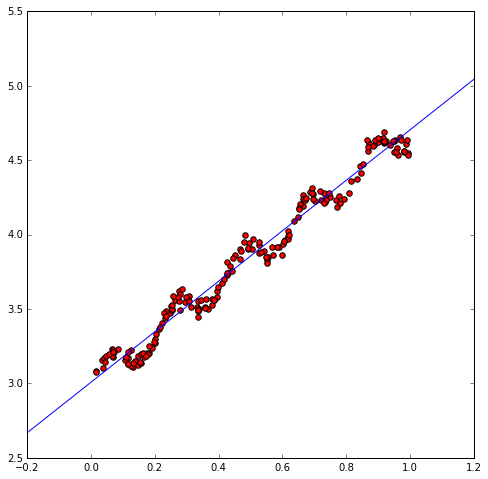

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.scatter(mat(dataMat)[:,1].A.flatten(), labelList,c='r',s=30)
x = arange(-0.2,1.4,0.01)
y = w[0]+w[1]*x
ax.plot(x, y.tolist()[0], c='b')
plt.xlim([-0.2,1.2])

In [9]:
yHat = (mat(dataMat) * w)
yReal = mat(labelList)
print corrcoef(yHat.T, yReal)

[[ 1.          0.98647356]
 [ 0.98647356  1.        ]]


# Locally weighted linear regression

In [10]:
def lwlrTrain(testList, dataMat, labelList, k=1.0):
    testVector = mat(testList).T;dataMatrix = mat(dataMat);labelVector=mat(labelList).T
    m,n = shape(dataMatrix)
    w = mat(eye((m)))
    for i in xrange(m):
        diff = dataMatrix[i,:].T - testVector
        w[i,i] = exp(-1 * (diff.T*diff) / (2.0*k**2))
    xTwX = dataMatrix.T * w * dataMatrix
    if linalg.det(xTwX) == 0.0:
        print 'this matrix cannot inverse'
        return
    return testVector.T * (xTwX.I * dataMatrix.T * w * labelVector)

In [11]:
def lwlrTest(testMat, dataMat, labelList, k=1.0):
    m = shape(testMat)[0]
    yHat = zeros(m)
    for i in xrange(m):
        yHat[i] = lwlrTrain(testMat[i], dataMat, labelList, k)
    return yHat

this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
this matrix cannot inverse
t

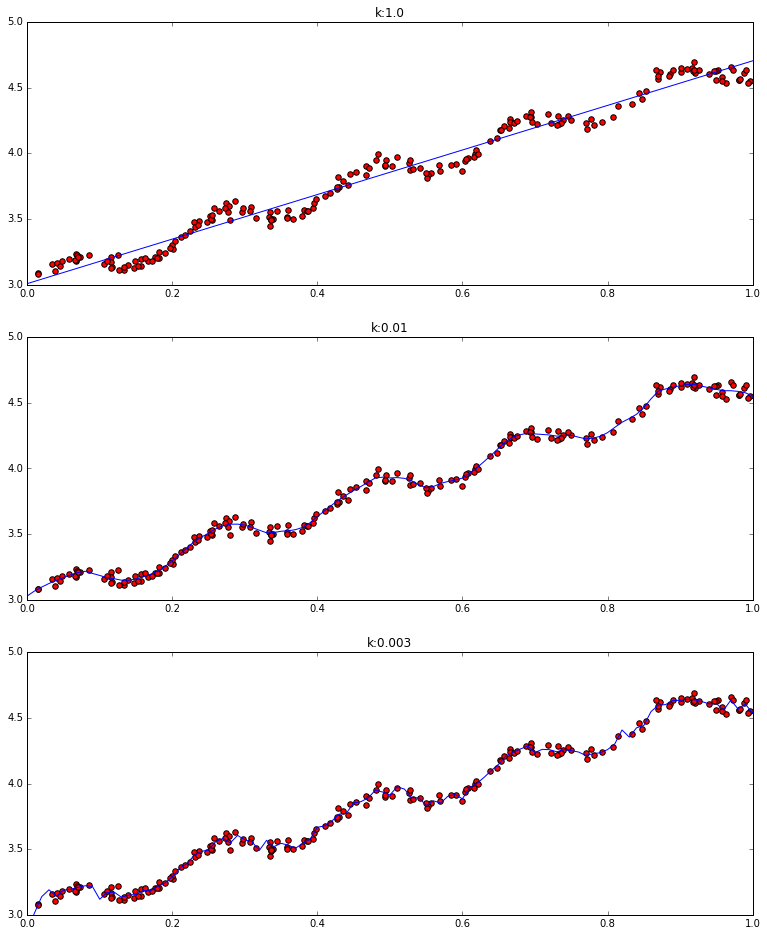

In [16]:
dataMat, labelList = loadData('./ex0.txt')
testX1 = arange(-0.2, 1.4, 0.01)
num = len(testX1)
testX0 = ones(num)
testMat = hstack((mat(testX0).T, mat(testX1).T))
i = 0
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(13,16))
for k in [1.0,0.01,0.003]:
    yHat = lwlrTest(testMat, dataMat, labelList, k)
    ax[i].scatter(mat(dataMat)[:,1].A.flatten(), labelList,c='r',s=30)
    ax[i].plot(testX1, yHat, c='b')
    ax[i].set_title('k:'+str(k))
    ax[i].set_xlim([-0.0,1.0])
    ax[i].set_ylim([3,5])
    i+=1

In [13]:
def calcRss(yArr, yHatArr):
    return ((yArr - yHatArr)**2).sum()

In [14]:
dataMat, labelList = loadData('abalone.txt')

In [15]:
yHat01 = lwlrTest(dataMat[0:99], dataMat[0:99], labelList[0:99], 0.1)
yHat1 = lwlrTest(dataMat[0:99], dataMat[0:99], labelList[0:99], 1)
yHat10 = lwlrTest(dataMat[0:99], dataMat[0:99], labelList[0:99], 10)

In [120]:
 yHat01[0:10]

array([ 13.24575548,   7.09647831,   9.3481702 ,   9.87633131,
         6.91898859,   8.00447089,  18.81400568,  14.67441064,
         8.59937673,  17.96366639])

In [121]:
print 'RSS of k:{} = {}'.format(0.1, calcRss(array(labelList[0:99]), yHat01))
print 'RSS of k:{} = {}'.format(1, calcRss(array(labelList[0:99]), yHat1))
print 'RSS of k:{} = {}'.format(10, calcRss(array(labelList[0:99]), yHat10))

RSS of k:0.1 = 56.8253937735
RSS of k:1 = 429.89056187
RSS of k:10 = 549.118170883


In [111]:
yHat01 = lwlrTest(dataMat[100:199], dataMat[0:99], labelList[0:99], 0.1)
yHat1 = lwlrTest(dataMat[100:199], dataMat[0:99], labelList[0:99], 1)
yHat10 = lwlrTest(dataMat[100:199], dataMat[0:99], labelList[0:99], 10)
print 'RSS of k:{} = {}'.format(0.1, calcRss(array(labelList[100:199]), yHat01))
print 'RSS of k:{} = {}'.format(1, calcRss(array(labelList[100:199]), yHat1))
print 'RSS of k:{} = {}'.format(10, calcRss(array(labelList[100:199]), yHat10))

RSS of k:0.1 = 126.152089818
RSS of k:1 = 23.9484058799
RSS of k:10 = 22.750191


In [112]:
w = standRegression(dataMat[0:99], labelList[0:99])

In [113]:
print w

[[ -0.22497662]
 [ 17.66412802]
 [ -1.07127738]
 [  1.28973014]
 [ -7.6543436 ]
 [ 12.57803154]
 [ -8.08378695]
 [ 22.51554477]]


In [114]:
yHat = mat(dataMat[100:199]) * w

In [115]:
print yHat[0:10]

[[  7.06324637]
 [ 11.07770041]
 [ 12.3102014 ]
 [ 10.49837973]
 [ 13.26358795]
 [ 11.07428513]
 [ 11.9819708 ]
 [ 10.85373969]
 [ 10.102607  ]
 [  8.68420749]]


In [116]:
print 'RSS of standard regression is : {}'.format(calcRss(yHat.T.A, array(labelList[100:199])))

RSS of standard regression is : 22.7735881083


# Shrinking coefficients to understand our data

## Ridge regression

In [103]:
def ridgeRegressionTrain(dataMat, labelList, lam=0.2):
    dataMatrix = mat(dataMat); labelVector = mat(labelList).T
    normalizedFactor = sqrt(sum(array(dataMatrix)**2.0,0))
    dataMatrixNormalized = dataMatrix/normalizedFactor
    denom = dataMatrix.T * dataMatrix + lam*mat(eye(shape(dataMatrix)[1]))
    if linalg.det(denom) == 0.0:
        print 'the matrix cannot inversed'
        return
    w = denom.I * dataMatrix.T * labelVector
    return (w, lam,normalizedFactor)

In [104]:
def ridgeRegressionTest(dataMat, labelList, w, lam,normalizedFactor):
    dataMatrix = mat(dataMat)/normalizedFactor; labelVector = array(labelList).T
    predictLabelVector = dataMatrix * w
    rss = calcRss(array(predictLabelVector), labelVector) + lam*w.T*w
    #print 'lambda is {} and Rss is {}'.format(lam, rss)
    return rss

the Mini Rss is [[ 644875.75806135]], and the lambda is 4.53999297625e-05


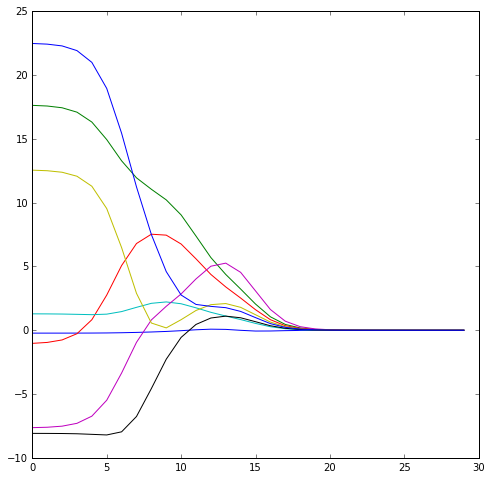

In [105]:
dataMat, labelList = loadData('abalone.txt')
ws = []
x = []
miniRss = inf
for i in xrange(30):    
    w, lam,normalizedFactor = ridgeRegressionTrain(dataMat[0:99], labelList[0:99], lam=exp(i-10))
    x.append(log(lam))
    ws.append(array(w).T.flatten().tolist())
    rss= ridgeRegressionTest(dataMat[100:199], labelList[100:199], w, lam,normalizedFactor)
    if rss < miniRss:
        miniRss = rss
        bestLam = lam
wsMatrix = mat(ws)
print 'the Mini Rss is {}, and the lambda is {}'.format(miniRss, bestLam)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(wsMatrix)

## Lasso regression

In [95]:
def computePj(m,j,w,dataMatrixNormalized,labelVector):
    pJ = 0.0
    wEJ = w[:]
    wEJ[j] = 0.0
    for i in xrange(m):
        pJ += dataMatrixNormalized[i,j]*(labelVector[j] - dataMatrixNormalized[i]*wEJ)
    return pJ

In [127]:
def trainLasso(dataMat, labelList, eps=0.01, lam=0.1, maxIter=150):
    dataMatrix = mat(dataMat); labelVector = mat(labelList).T
    maxStep = inf
    m,n = shape(dataMatrix)
    normalizedFactor = sqrt(sum(array(dataMatrix)**2.0,0))
    dataMatrixNormalized = dataMatrix / normalizedFactor
    w = mat(ones(n)).T
    while (maxStep >= eps or maxIter>0):
        maxStep = -1
        maxIter -= 1
        for j in xrange(n):
            oldWJ = w[j]
            pj = computePj(m,j,w,dataMatrixNormalized, labelVector)
            if pj < -lam/2.0:
                w[j] = pj + lam/2.0
            elif pj > lam/2.0:
                w[j] = pj - lam/2.0
            else:
                w[j] = 0
            step = abs(oldWJ - w[j])
            if step > maxStep:
                maxStep = step
    return (w, lam, normalizedFactor)

In [128]:
def testLasso(dataMat, labelList, w, lam, normalizedFactor):
    dataMatrix = mat(dataMat)/normalizedFactor; labelVector = array(labelList).T
    predictLabelVector = dataMatrix * w
    rss = calcRss(array(predictLabelVector), labelVector) + lam*sum(abs(w))
    #print 'lambda is {} and Rss is {}'.format(lam, rss)
    return rss

the Mini Rss is 548130.581822, and the lambda is 148.413159103


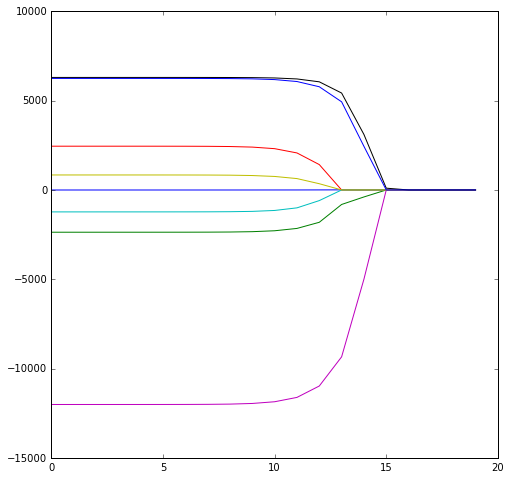

In [129]:
dataMat, labelList = loadData('abalone.txt')
ws = []
miniRss = inf
for i in xrange(20):
    w, lam,normalizedFactor = trainLasso(dataMat[0:99], labelList[0:99], lam=exp(i-10))
    ws.append(array(w).T.flatten().tolist())
    rss= testLasso(dataMat[100:199], labelList[100:199], w, lam,normalizedFactor)
    if rss < miniRss:
        miniRss = rss
        bestLam = lam
wsMatrix = mat(ws)
print 'the Mini Rss is {}, and the lambda is {}'.format(miniRss, bestLam)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(wsMatrix)

# Example: forecasting the price of LEGO sets